In [1]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('fraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.shape

(284807, 31)

In [20]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df.Class

In [21]:
from sklearn.svm import SVC
clf = SVC()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=58)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [37]:
clf.fit(X_train,y_train)

SVC()

In [38]:
clf.score(X_test,y_test)

0.9986833327481479

In [36]:
pd.DataFrame(y_train).Class.value_counts()

0    227445
1       400
Name: Class, dtype: int64

In [24]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [39]:
df_class_1 = df[df['Class']==1]
df_class_1.shape

(492, 31)

In [48]:
X_class_1 = df_class_1.drop(['Time', 'Class'], axis =1)
y_class_1_tag = df_class_1.Class
X_class_1.shape

(492, 29)

In [41]:
one_class_preds = clf.predict(X_class_1)

In [46]:
preds = pd.DataFrame(one_class_preds, columns = ['Prediction'])
preds.Prediction.value_counts()

0    316
1    176
Name: Prediction, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_class_1_tag, preds)

In [50]:
cm

array([[  0,   0],
       [316, 176]])

<AxesSubplot:>

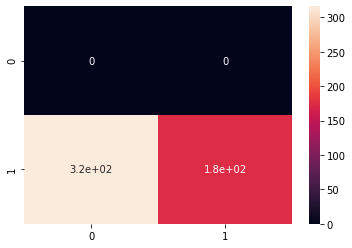

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(cm, annot = True)

<AxesSubplot:xlabel='Prediction', ylabel='count'>

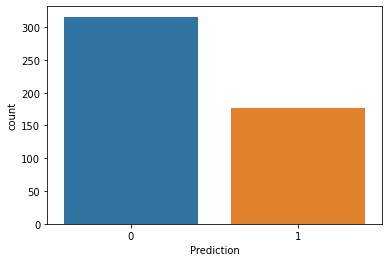

In [53]:
sns.countplot(preds['Prediction'])